In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('ISEAR.csv')
df.head(5)

,0,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.
0,1,fear,Every time I imagine that someone I love or I ...
1,2,anger,When I had been obviously unjustly treated and...
2,3,sadness,When I think about the short time that we live...
3,4,disgust,At a gathering I found myself involuntarily si...
4,5,shame,When I realized that I was directing the feeli...


In [3]:
df.columns

Index(['0', 'joy',
       'On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.'],
      dtype='object')

In [4]:
# df.rename(columns={'0':'Number'})
df_new = df.rename( columns={'0':'number' , 'On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.':'sentence'} )

In [5]:
df_new.head(10)

,number,joy,sentence
0,1,fear,Every time I imagine that someone I love or I ...
1,2,anger,When I had been obviously unjustly treated and...
2,3,sadness,When I think about the short time that we live...
3,4,disgust,At a gathering I found myself involuntarily si...
4,5,shame,When I realized that I was directing the feeli...
5,6,guilt,I feel guilty when when I realize that I consi...
6,7,joy,After my girlfriend had taken her exam we went...
7,8,fear,"When, for the first time I realized the meanin..."
8,9,anger,When a car is overtaking another and I am forc...
9,10,sadness,When I recently thought about the hard work it...


In [6]:
df_new['sentence'][5]

'I feel guilty when when I realize that I consider material things  \nmore important than caring for my relatives.  I feel very  \nself-centered.'

In [7]:
df_new.joy.unique()

array(['fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy'],
      dtype=object)

In [8]:
df_new['joy'].values

array(['fear', 'anger', 'sadness', ..., 'disgust', 'shame', 'guilt'],
      dtype=object)

#### create new column `emotion_catg` with if and for loop with the `joy` column

In [9]:
emotion_id = []

for value in df_new['joy'].values:
    if  value == 'fear':
        emotion_id.append(0)
    elif value == 'joy':
        emotion_id.append(1)
    elif value == 'sadness':
        emotion_id.append(2)
    elif value == 'shame':
        emotion_id.append(3)
    elif value == 'guilt':
        emotion_id.append(3)
    elif value == 'anger':
        emotion_id.append(4)
    elif value == 'disgust':
        emotion_id.append(4)

df_new['emotion_id'] = emotion_id

In [10]:
df_new.head(10)

,number,joy,sentence,emotion_id
0,1,fear,Every time I imagine that someone I love or I ...,0
1,2,anger,When I had been obviously unjustly treated and...,4
2,3,sadness,When I think about the short time that we live...,2
3,4,disgust,At a gathering I found myself involuntarily si...,4
4,5,shame,When I realized that I was directing the feeli...,3
5,6,guilt,I feel guilty when when I realize that I consi...,3
6,7,joy,After my girlfriend had taken her exam we went...,1
7,8,fear,"When, for the first time I realized the meanin...",0
8,9,anger,When a car is overtaking another and I am forc...,4
9,10,sadness,When I recently thought about the hard work it...,2


In [11]:
emotion_catg = []

for value in df_new['emotion_id'].values:
    if  value == 0:
        emotion_catg.append('fear')
    elif value == 1:
        emotion_catg.append('joy')
    elif value == 2:
        emotion_catg.append('sadness')
    elif value == 3:
        emotion_catg.append('guilt')
    elif value == 4:
        emotion_catg.append('anger')
        
df_new['emotion_catg'] = emotion_catg

In [12]:
word_count = pd.value_counts(df_new['emotion_catg'].values, sort=False)
word_count

sadness    1074
anger      2128
joy        1081
guilt      2099
fear       1063
dtype: int64

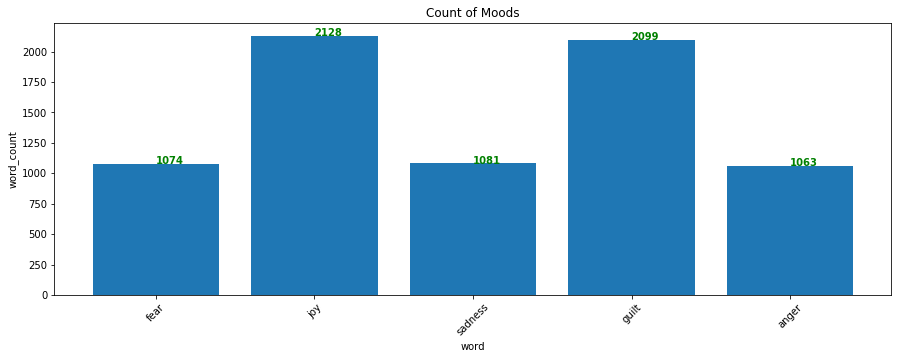

In [13]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['fear','joy','sadness','guilt','anger'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')

#### Function to clean `sentence` column

In [14]:
df_new['sentence'][0]

'Every time I imagine that someone I love or I could contact a  \nserious illness, even death.'

In [15]:
from nltk.stem import WordNetLemmatizer


In [16]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/srijana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/srijana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
import re

In [19]:
corpus= []
for i in range(0, 7445):
    corpus.append(review_to_words(df_new['sentence'][i]))

#### Create the new column `new_sentence` and merge in dataframe

In [20]:
df_new['new_sentence'] = corpus

In [21]:
df_new['new_sentence'][0]

'every time imagine someone love could contact serious illness even death'

In [22]:
df_new.head(5)

,number,joy,sentence,emotion_id,emotion_catg,new_sentence
0,1,fear,Every time I imagine that someone I love or I ...,0,fear,every time imagine someone love could contact ...
1,2,anger,When I had been obviously unjustly treated and...,4,anger,obviously unjustly treated possibility elucida...
2,3,sadness,When I think about the short time that we live...,2,sadness,think short time live relate period life think...
3,4,disgust,At a gathering I found myself involuntarily si...,4,anger,gathering found involuntarily sitting next two...
4,5,shame,When I realized that I was directing the feeli...,3,guilt,realized directing feeling discontent partner ...


In [23]:
df_new.drop(['sentence'], axis=1, inplace=True)

In [24]:
df1 = df_new.copy()
df1.head(5)

,number,joy,emotion_id,emotion_catg,new_sentence
0,1,fear,0,fear,every time imagine someone love could contact ...
1,2,anger,4,anger,obviously unjustly treated possibility elucida...
2,3,sadness,2,sadness,think short time live relate period life think...
3,4,disgust,4,anger,gathering found involuntarily sitting next two...
4,5,shame,3,guilt,realized directing feeling discontent partner ...


#### Select fear from `emotion_catg`

In [25]:
fear = df_new[df_new['emotion_catg'] == ('fear')]

#### Prepare the data to split it

In [26]:
words = ' '.join(fear['new_sentence'])
split_word = " ".join([word for word in words.split()])


#### Preparing the data to visualize 

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)


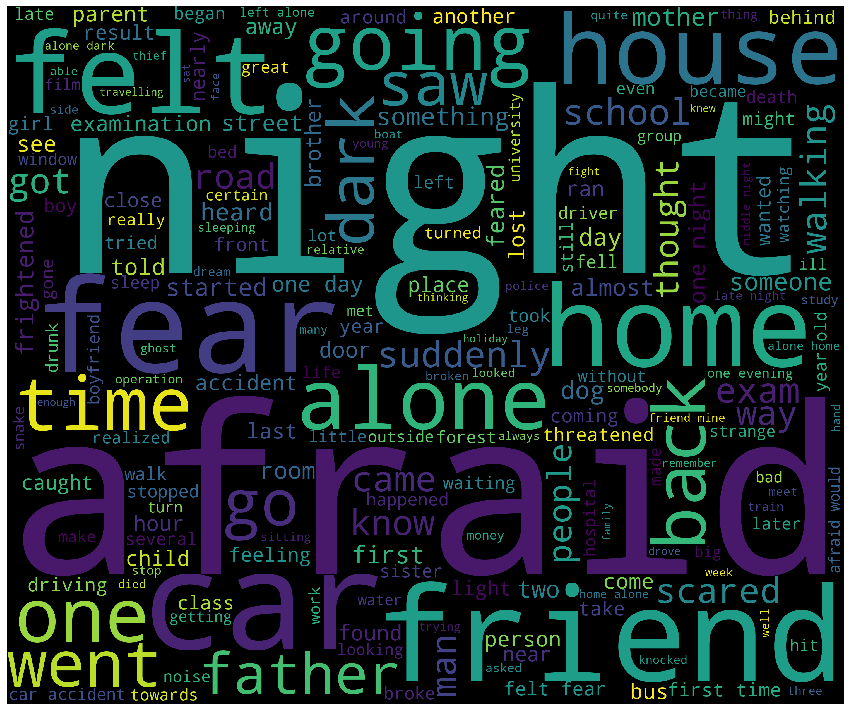

In [29]:
plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#### Counting every words in emotion_categories - fear 

In [30]:
fear_1 = fear['new_sentence']

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

In [32]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)

In [33]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
fear_1_words = vectorizer.fit_transform(fear_1)

In [35]:
fear_1_words = fear_1_words.toarray()

In [36]:
fear_1 = vectorizer.get_feature_names()

In [37]:
fear_1

['abandoned',
 'ability',
 'able',
 'absailing',
 'academic',
 'accept',
 'accepted',
 'accident',
 'accidentally',
 'accompanied',
 'acquaintance',
 'across',
 'acting',
 'action',
 'actually',
 'admission',
 'admitted',
 'afraid',
 'afternoon',
 'afterwards',
 'age',
 'ago',
 'agreed',
 'ahead',
 'air',
 'alarm',
 'alcohol',
 'alive',
 'alley',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'anatomy',
 'angry',
 'animal',
 'annoyed',
 'another',
 'answer',
 'anxiety',
 'anxious',
 'anybody',
 'anything',
 'anyway',
 'apartment',
 'apologize',
 'apparent',
 'appartment',
 'appear',
 'appearance',
 'appeared',
 'appointment',
 'approached',
 'approaching',
 'area',
 'argument',
 'arm',
 'armed',
 'army',
 'around',
 'arrived',
 'arriving',
 'ask',
 'asked',
 'asleep',
 'assault',
 'assaulted',
 'attack',
 'attacked',
 'attempt',
 'attending',
 'attention',
 'auckland',
 'audience',
 'autumn',
 'avoid',
 'awake',
 'away',
 'awful',
 'baby',
 'back',
 'bad',

In [38]:
fear_1_words.shape

(1063, 2000)

In [39]:
import numpy as np

In [40]:
dist = np.sum(fear_1_words, axis=0)
for tag, count in zip(fear_1, dist):
    print (tag,count)

abandoned 1
ability 2
able 11
absailing 2
academic 3
accept 2
accepted 3
accident 41
accidentally 2
accompanied 2
acquaintance 3
across 7
acting 4
action 2
actually 5
admission 3
admitted 4
afraid 122
afternoon 2
afterwards 2
age 9
ago 15
agreed 2
ahead 3
air 4
alarm 2
alcohol 3
alive 2
alley 4
almost 32
alone 113
along 17
already 7
also 10
although 8
always 11
anatomy 9
angry 6
animal 2
annoyed 2
another 23
answer 3
anxiety 4
anxious 6
anybody 5
anything 4
anyway 2
apartment 2
apologize 2
apparent 2
appartment 2
appear 3
appearance 2
appeared 7
appointment 3
approached 7
approaching 4
area 10
argument 2
arm 4
armed 3
army 4
around 20
arrived 4
arriving 2
ask 4
asked 12
asleep 2
assault 2
assaulted 9
attack 6
attacked 8
attempt 2
attending 2
attention 3
auckland 3
audience 2
autumn 2
avoid 3
awake 3
away 31
awful 3
baby 8
back 65
bad 14
badly 4
balance 2
balcony 2
ball 2
bank 3
bar 2
barking 7
bathroom 2
beach 4
bear 2
beat 3
beaten 6
became 15
becoming 2
bed 16
bedroom 3
beer 3
began 

In [41]:
fear_new = pd.DataFrame(dist)

In [42]:
fear_new.columns = ['word_count']

In [43]:
fear_new['word'] = pd.Series(fear_1, index=fear_new.index)

In [44]:
fear_new_1 = fear_new[['word', 'word_count']]
fear_new_1.head(5)

,word,word_count
0,abandoned,1
1,ability,2
2,able,11
3,absailing,2
4,academic,3


In [45]:
top_10_words=fear_new_1.sort_values(['word_count'],ascending=[0])
top_10_words.head(10)

,word,word_count
959,night,164
980,one,134
169,car,122
17,afraid,122
624,fear,118
30,alone,113
753,home,112
681,friend,109
1973,would,106
633,felt,92


In [46]:

cv = CountVectorizer(max_features = 1500)
df_new = cv.fit_transform(corpus).toarray()





In [48]:
y = df1.emotion_catg.values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new,y, test_size = 0.40, random_state = 0)

In [50]:
len(X_train) , len(X_test), len(y_train), len(y_test)

(4467, 2978, 4467, 2978)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/srijana/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = model.predict(X_test)


In [53]:
model.score(X_test, y_test)

0.6108126259234385

#### Naive Bayes

First check the split divide uniformly or not

In [56]:
from scipy.stats import itemfreq

itemfreq(y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([['anger', 1308],
       ['fear', 623],
       ['guilt', 1253],
       ['joy', 627],
       ['sadness', 656]], dtype=object)

In [57]:
itemfreq(y_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


array([['anger', 820],
       ['fear', 440],
       ['guilt', 846],
       ['joy', 454],
       ['sadness', 418]], dtype=object)

In [58]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [59]:
nb_clf_accuracy = np.mean(y_pred == y_test) * 100

In [60]:
nb_clf_accuracy

60.67830758898589